In [120]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy.linalg import norm



In [121]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

In [122]:
Base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
Base_model.trainable=False

In [123]:
model=Sequential([Base_model,
                 GlobalMaxPooling2D()])




In [124]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_5          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [125]:
from tensorflow.keras.utils import plot_model
# plot_model(model,show)

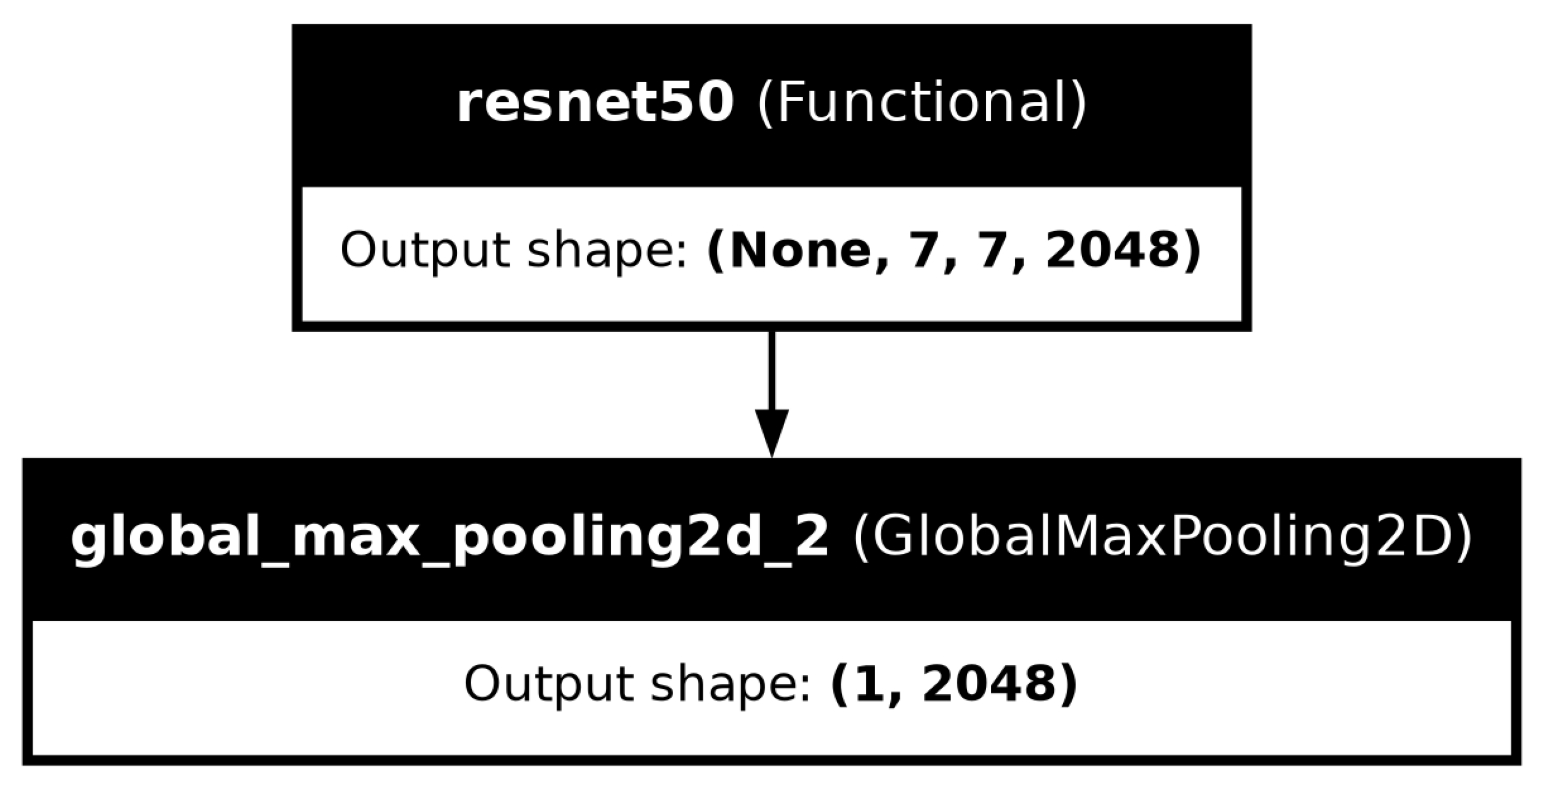

In [131]:
# plot_model(model=model,show_layer_names=True,show_shapes=True)
a=plt.imread("/kaggle/working/model.png")
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(a)

In [ ]:
def extract_features(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img,verbose=0).flatten()
    normalized_result = result / norm(result)

    return normalized_result

In [ ]:
import os
file_name=[]

for file in os.listdir('/kaggle/input/fashion-product-images-small/images'):
    file_name.append(os.path.join('/kaggle/input/fashion-product-images-small/images',file))

In [ ]:
file_name[:5]

In [ ]:
# from time import time
# from tqdm import tqdm
# start_time=time()
# feature_list=[]

# with tqdm(total=len(file_name), desc="Processing images") as pbar:
#     for file in file_name:
#         feature_list.append(extract_features(file, model))
#         pbar.update(1)  # Update progress bar

    
# print("Done"+str(time().start_time()))

In [ ]:
import pickle
pickle.dump(feature_list,open('embeddings.pkl','wb'))
pickle.dump(file_name,open('file_name.pkl','wb'))

In [ ]:
feature_list=np.array(pickle.load(open('/kaggle/working/embeddings.pkl','rb')))

In [ ]:
feature_list.shape

In [ ]:
filenames=pickle.load(open('/kaggle/working/file_name.pkl','rb'))

In [ ]:
filenames[:5]

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

In [ ]:

img = image.load_img('/kaggle/input/recommender-test/10000.jpg',target_size=(224,224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)
a,b=neighbors.kneighbors([normalized_result])

In [ ]:
b

In [ ]:
import cv2
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for i, file in enumerate(b[0][0:3]):
    temp_img = plt.imread(filenames[file])
    resized_img = cv2.resize(temp_img, (224, 224))
    axes[i].imshow(resized_img)
    axes[i].axis('off')  
plt.show()  # Display the subplots


In [ ]:
def predict(path,neighbors):
    img = image.load_img(path,target_size=(224,224))
    plt.imshow(img)
    plt.title("Input image")
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)
    a,b=neighbors.kneighbors([normalized_result])
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for i, file in enumerate(b[0][0:3]):
        temp_img = plt.imread(filenames[file])
        resized_img = cv2.resize(temp_img, (512, 512))
        axes[i].imshow(resized_img)
        axes[i].set_title(f"Recommendation {i+1}")
        axes[i].axis('off')  
   
    plt.show() 
    
    

In [ ]:
predict('/kaggle/input/recommender-test/10001.jpg',neighbors=neighbors)

#### This is a product recommendation system used by many sites in this we used basic transfer learing and basics of linear algebra

### Regards <br> **Ayush kumar** <br>Data Scientist